<a href="https://colab.research.google.com/github/starlit25/DAP_/blob/main/DAP_%EC%9E%84%ED%98%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **▣ 입시결과 데이터 분석하기** 
 - 데이터분석프로그래밍 프로젝트

 : 강원대학교 수시모집 입시결과 데이터를 기반으로 입시에 도움될만한 유의미한 데이터를 도출하는 것이 목표

 

- 2018년 이전에는 컴퓨터공학과가 컴퓨터정보통신공학과와 컴퓨터과학과로 나뉘어 있어, 컴퓨터공학과(혹은 컴퓨터학부)로 합쳐진 2018년 이후 데이터 사용

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,065 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
plt.rc('font', family='NanumBarunGothic') 

In [5]:
from google.colab import files
myfile = files.upload()

Saving 2018학년도 수시모집 전형별 입시결과.xlsx to 2018학년도 수시모집 전형별 입시결과.xlsx
Saving 2019학년도 수시모집 전형별 입시결과.xlsx to 2019학년도 수시모집 전형별 입시결과.xlsx
Saving 2020학년도 수시모집 전형별 입시결과.xlsx to 2020학년도 수시모집 전형별 입시결과.xlsx
Saving 2021학년도 수시모집 전형별 입시결과.xlsx to 2021학년도 수시모집 전형별 입시결과.xlsx


In [6]:
data21_ori = pd.read_excel('2021학년도 수시모집 전형별 입시결과.xlsx', sheet_name = 4, skiprows=1,header=[0,1,2],keep_default_na=False) #교과우수자 DATA
data20_ori = pd.read_excel('2020학년도 수시모집 전형별 입시결과.xlsx', sheet_name = 4, skiprows=1,header=[0,1,2],keep_default_na=False)
data19_ori = pd.read_excel('2019학년도 수시모집 전형별 입시결과.xlsx', sheet_name = 3, skiprows=1,header=[1,2,3])
data18_ori = pd.read_excel('2018학년도 수시모집 전형별 입시결과.xlsx', sheet_name = 4, skiprows=1,header=[1,2,3])

In [7]:
data21_local = pd.read_excel('2021학년도 수시모집 전형별 입시결과.xlsx', sheet_name = 5, skiprows=1,header=[0,1,2]) #지역인재 DATA
data20_local = pd.read_excel('2020학년도 수시모집 전형별 입시결과.xlsx', sheet_name = 5, skiprows=1,header=[0,1,2])
data19_local = pd.read_excel('2019학년도 수시모집 전형별 입시결과.xlsx', sheet_name = 4, skiprows=1,header=[1,2,3])
data18_local = pd.read_excel('2018학년도 수시모집 전형별 입시결과.xlsx', sheet_name = 5, skiprows=1,header=[1,2,3])

In [8]:
df21_ori=data21_ori.rename(columns = {'Unnamed: 0_level_1':'', 'Unnamed: 1_level_1':'', 'Unnamed: 2_level_1':'', 'Unnamed: 0_level_2':'', 'Unnamed: 1_level_2':'', 'Unnamed: 2_level_2':'','Unnamed: 3_level_2':'','Unnamed: 4_level_2':'','Unnamed: 5_level_2':'', 'Unnamed: 6_level_2':'', 'Unnamed: 7_level_2':'', 'Unnamed: 8_level_2':'', 'Unnamed: 9_level_2':'', 'Unnamed: 10_level_2':''})
df20_ori=data20_ori.rename(columns = {'Unnamed: 0_level_1':'', 'Unnamed: 1_level_1':'', 'Unnamed: 2_level_1':'', 'Unnamed: 0_level_2':'', 'Unnamed: 1_level_2':'', 'Unnamed: 2_level_2':'','Unnamed: 3_level_2':'','Unnamed: 4_level_2':'','Unnamed: 5_level_2':'', 'Unnamed: 6_level_2':'', 'Unnamed: 7_level_2':'', 'Unnamed: 8_level_2':'', 'Unnamed: 9_level_2':'', 'Unnamed: 10_level_2':''})
df19_ori=data19_ori.rename(columns = {'Unnamed: 0_level_1':'', 'Unnamed: 1_level_1':'', 'Unnamed: 2_level_1':'', 'Unnamed: 0_level_2':'', 'Unnamed: 1_level_2':'', 'Unnamed: 2_level_2':'','Unnamed: 3_level_2':'','Unnamed: 4_level_2':'','Unnamed: 5_level_2':'', 'Unnamed: 6_level_2':'', 'Unnamed: 7_level_2':'', 'Unnamed: 8_level_2':'', 'Unnamed: 9_level_2':'', 'Unnamed: 10_level_2':''})
df18_ori=data18_ori.rename(columns = {'Unnamed: 0_level_1':'', 'Unnamed: 1_level_1':'', 'Unnamed: 2_level_1':'', 'Unnamed: 0_level_2':'', 'Unnamed: 1_level_2':'', 'Unnamed: 2_level_2':'','Unnamed: 3_level_2':'','Unnamed: 4_level_2':'','Unnamed: 5_level_2':'', 'Unnamed: 6_level_2':'', 'Unnamed: 7_level_2':'', 'Unnamed: 8_level_2':'', 'Unnamed: 9_level_2':'', 'Unnamed: 10_level_2':''})

df21_local=data21_local.rename(columns = {'Unnamed: 0_level_1':'', 'Unnamed: 1_level_1':'', 'Unnamed: 2_level_1':'', 'Unnamed: 0_level_2':'', 'Unnamed: 1_level_2':'', 'Unnamed: 2_level_2':'','Unnamed: 3_level_2':'','Unnamed: 4_level_2':'','Unnamed: 5_level_2':'', 'Unnamed: 6_level_2':'', 'Unnamed: 7_level_2':'', 'Unnamed: 8_level_2':'', 'Unnamed: 9_level_2':'', 'Unnamed: 10_level_2':''})
df20_local=data20_local.rename(columns = {'Unnamed: 0_level_1':'', 'Unnamed: 1_level_1':'', 'Unnamed: 2_level_1':'', 'Unnamed: 0_level_2':'', 'Unnamed: 1_level_2':'', 'Unnamed: 2_level_2':'','Unnamed: 3_level_2':'','Unnamed: 4_level_2':'','Unnamed: 5_level_2':'', 'Unnamed: 6_level_2':'', 'Unnamed: 7_level_2':'', 'Unnamed: 8_level_2':'', 'Unnamed: 9_level_2':'', 'Unnamed: 10_level_2':''})
df19_local=data19_local.rename(columns = {'Unnamed: 0_level_1':'', 'Unnamed: 1_level_1':'', 'Unnamed: 2_level_1':'', 'Unnamed: 0_level_2':'', 'Unnamed: 1_level_2':'', 'Unnamed: 2_level_2':'','Unnamed: 3_level_2':'','Unnamed: 4_level_2':'','Unnamed: 5_level_2':'', 'Unnamed: 6_level_2':'', 'Unnamed: 7_level_2':'', 'Unnamed: 8_level_2':'', 'Unnamed: 9_level_2':'', 'Unnamed: 10_level_2':''})
df18_local=data18_local.rename(columns = {'Unnamed: 0_level_1':'', 'Unnamed: 1_level_1':'', 'Unnamed: 2_level_1':'', 'Unnamed: 0_level_2':'', 'Unnamed: 1_level_2':'', 'Unnamed: 2_level_2':'','Unnamed: 3_level_2':'','Unnamed: 4_level_2':'','Unnamed: 5_level_2':'', 'Unnamed: 6_level_2':'', 'Unnamed: 7_level_2':'', 'Unnamed: 8_level_2':'', 'Unnamed: 9_level_2':'', 'Unnamed: 10_level_2':''})

# ※ 연도별 컴퓨터공학과 지원 추세 비교

In [9]:
#교과(일반)전형 연도별 모집인원, 지원자, 경쟁률
competition = pd.DataFrame({'2018년':[df18_ori.loc[54].values[2], df18_ori.loc[54].values[3], df18_ori.loc[54].values[4]],
                            '2019년':[df19_ori.loc[58].values[4], df19_ori.loc[58].values[5], df19_ori.loc[58].values[6]],
                            '2020년':[df20_ori.loc[54].values[3], df20_ori.loc[54].values[4], df20_ori.loc[54].values[5]],
                            '2021년':[df21_ori.loc[53].values[3], df21_ori.loc[53].values[4], df21_ori.loc[53].values[5]]
                         })
competition.index=['모집인원','지원자','경쟁률']

In [10]:
competition

,2018년,2019년,2020년,2021년
모집인원,43.000000,40.000,39.000000,38.000000
지원자,317.000000,395.000,311.000000,230.000000
경쟁률,7.372093,9.875,7.974359,6.052632


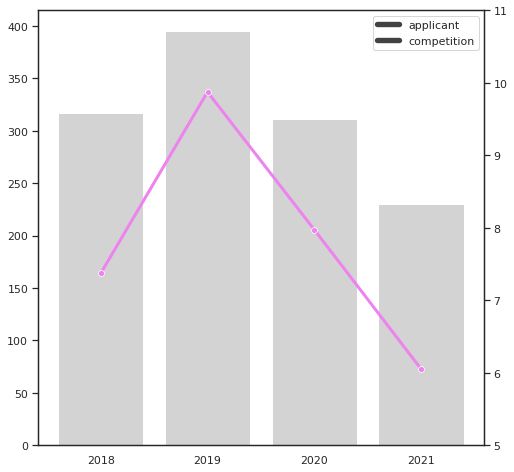

In [11]:
#연도별 컴퓨터공학과 모집인원 및 경쟁률
sns.set(style='white',rc={'lines.linewidth':3})
fig, ax = plt.subplots(figsize=(8,8))
ax2= ax.twinx()
sns.barplot(x=['2018','2019','2020','2021'],           
             y=[competition.loc['지원자'].values[0],competition.loc['지원자'].values[1],competition.loc['지원자'].values[2],competition.loc['지원자'].values[3]],
             color='lightgrey', ax=ax)

sns.lineplot(x=['2018','2019','2020','2021'],
             y=[competition.loc['경쟁률'].values[0],competition.loc['경쟁률'].values[1],competition.loc['경쟁률'].values[2],competition.loc['경쟁률'].values[3]],
             color='violet', marker='o',ax=ax2,)

ax.legend(['applicant','competition'])
plt.ylim(5.0,11.0)
plt.show()

sns.set()

In [12]:
#지역인재전형 지원자 평균등급, 최고등급, 최저등급
applicant21_local = [df21_local.loc[54].values[11], df21_local.loc[54].values[13], df21_local.loc[54].values[14]]
applicant20_local = [df20_local.loc[54].values[10], df20_local.loc[54].values[12], df20_local.loc[54].values[13]]
applicant19_local = [df19_local.loc[58].values[12], df19_local.loc[58].values[14], df19_local.loc[58].values[15]]
applicant18_local = [df18_local.loc[53].values[8], df18_local.loc[53].values[10], df18_local.loc[53].values[11]]

#지역인재전형 최초합격자 평균등급, 최고등급, 최저등급
fir_pass21_local = [df21_local.loc[54].values[25], df21_local.loc[54].values[27], df21_local.loc[54].values[28]]
fir_pass20_local = [df20_local.loc[54].values[24], df20_local.loc[54].values[26], df20_local.loc[54].values[27]]
fir_pass19_local = [df19_local.loc[58].values[26], df19_local.loc[58].values[28], df19_local.loc[58].values[29]]
fir_pass18_local = [df18_local.loc[53].values[21], df18_local.loc[53].values[23], df18_local.loc[53].values[24]]

#지역인재전형 최종합격자 평균등급, 최고등급, 최저등급 / 2018,2019년도는 평균등급만 존재
final_pass21_local = [df21_local.loc[54].values[33], df21_local.loc[54].values[35], df21_local.loc[54].values[36]]
final_pass20_local = [df20_local.loc[54].values[32], df20_local.loc[54].values[34], df20_local.loc[54].values[35]]
final_pass19_local = [df19_local.loc[58].values[34]]
final_pass18_local = [df18_local.loc[53].values[21]]

In [13]:
#index를 모집단위로 변경
df18_ori = df18_ori.set_index('모집단위')
df19_ori = df19_ori.set_index('모집단위')
df20_ori = df20_ori.set_index('모집단위')
df21_ori = df21_ori.set_index('모집단위')

data18_local = data18_local.set_index('모집단위')
data19_local = data19_local.set_index('모집단위')
data20_local = data20_local.set_index('모집단위')
data21_local = data21_local.set_index('모집단위')

In [14]:
#교과(일반)전형 지원자 평균등급, 최고등급, 최저등급
applicant21_ori = [df21_ori.loc['컴퓨터공학과'].values[10], df21_ori.loc['컴퓨터공학과'].values[12], df21_ori.loc['컴퓨터공학과'].values[13]]
applicant20_ori = [df20_ori.loc['컴퓨터공학과'].values[9], df20_ori.loc['컴퓨터공학과'].values[11], df20_ori.loc['컴퓨터공학과'].values[12]]
applicant19_ori = [df19_ori.loc['컴퓨터학부'].values[10], df19_ori.loc['컴퓨터학부'].values[12], df19_ori.loc['컴퓨터학부'].values[13]]
applicant18_ori = [df18_ori.loc['컴퓨터학부'].values[7], df18_ori.loc['컴퓨터학부'].values[9], df18_ori.loc['컴퓨터학부'].values[9]]

#교과(일반)전형 최초합격자 평균등급, 최고등급, 최저등급
fir_pass21_ori = [df21_ori.loc['컴퓨터공학과'].values[24], df21_ori.loc['컴퓨터공학과'].values[26], df21_ori.loc['컴퓨터공학과'].values[27]]
fir_pass20_ori = [df20_ori.loc['컴퓨터공학과'].values[23], df20_ori.loc['컴퓨터공학과'].values[25], df20_ori.loc['컴퓨터공학과'].values[26]]
fir_pass19_ori = [df19_ori.loc['컴퓨터학부'].values[24], df19_ori.loc['컴퓨터학부'].values[26], df19_ori.loc['컴퓨터학부'].values[27]]
fir_pass18_ori = [df18_ori.loc['컴퓨터학부'].values[16], df18_ori.loc['컴퓨터학부'].values[18], df18_ori.loc['컴퓨터학부'].values[19]]

#교과(일반)전형 최종합격자 평균등급, 최고등급, 최저등급 / 2018,2019년도는 평균등급만 존재
final_pass21_ori = [df21_ori.loc['컴퓨터공학과'].values[32], df21_ori.loc['컴퓨터공학과'].values[34], df21_ori.loc['컴퓨터공학과'].values[35]]
final_pass20_ori = [df20_ori.loc['컴퓨터공학과'].values[31], df20_ori.loc['컴퓨터공학과'].values[33], df20_ori.loc['컴퓨터공학과'].values[34]]
final_pass19_ori = [df19_ori.loc['컴퓨터학부'].values[32]]
final_pass18_ori = [df18_ori.loc['컴퓨터학부'].values[25]]

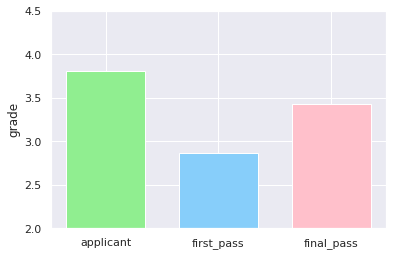

In [15]:
#2021년도 교과(일반)전형 지원자, 최초합격자, 최종등록자 비교
x=['applicant', 'first_pass', 'final_pass']
y=[applicant21_ori[0], fir_pass21_ori[0], final_pass21_ori[0]]

x_range = np.arange(len(x))
plt.bar(x_range, y, width = 0.7, color=['lightgreen','lightskyblue','pink'])
plt.xticks(x_range, x)
plt.ylim(2.0,4.5)
plt.ylabel('grade')

plt.show()

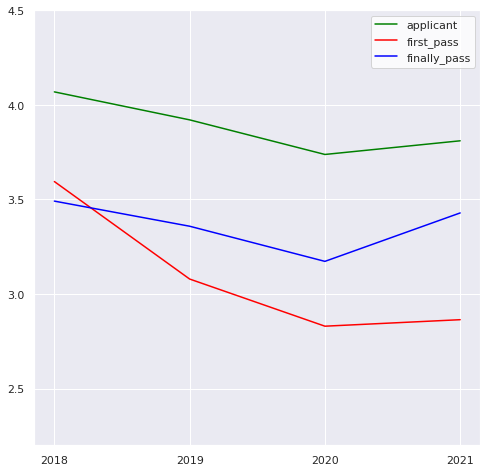

In [16]:
#교과(일반)전형 연도별 지원자, 최초합격자, 최종합격자 성적변화 추이
ig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x=['2018','2019','2020','2021'],
             y=[applicant18_ori[0], applicant19_ori[0], applicant20_ori[0], applicant21_ori[0]],
             color='green', ax=ax)

sns.lineplot(x=['2018','2019','2020','2021'],
             y=[fir_pass18_ori[0], fir_pass19_ori[0], fir_pass20_ori[0], fir_pass21_ori[0]],
             color='red', ax=ax)

sns.lineplot(x=['2018','2019','2020','2021'],
             y=[final_pass18_ori[0], final_pass19_ori[0], final_pass20_ori[0], final_pass21_ori[0]],
             color='blue', ax=ax)

plt.ylim(2.2, 4.5)
ax.legend(['applicant', 'first_pass', 'finally_pass'], facecolor='w')
plt.show()

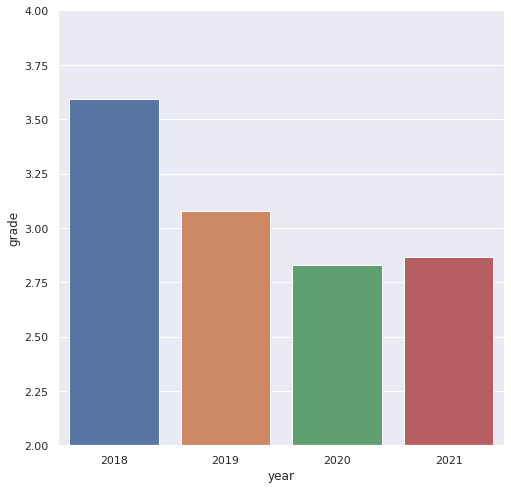

In [17]:
#교과(일반)전형 연도별 성적 추이
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=['2018','2019','2020','2021'],           
             y=[fir_pass18_ori[0],fir_pass19_ori[0],fir_pass20_ori[0],fir_pass21_ori[0]],
             ax=ax)

plt.ylim(2.0, 4.0)
plt.xlabel('year')
plt.ylabel('grade')
plt.show()

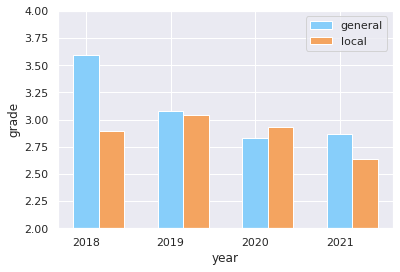

In [18]:
#교과(일반)전형 vs 지역인재 전형
year=['2018','2019','2020','2021']

y1=[fir_pass18_ori[0],fir_pass19_ori[0],fir_pass20_ori[0],fir_pass21_ori[0]]
y2=[fir_pass18_local[0],fir_pass19_local[0],fir_pass20_local[0],fir_pass21_local[0]]

x_range = np.arange(len(year))
plt.bar(x_range + 0.0, y1, width = 0.3, label='general', color='lightskyblue')
plt.bar(x_range + 0.3, y2, width = 0.3, label='local', color='sandybrown')
plt.xticks(x_range, year)
plt.ylim(2.0,4.0)
plt.legend()
plt.xlabel('year')
plt.ylabel('grade')

plt.show()

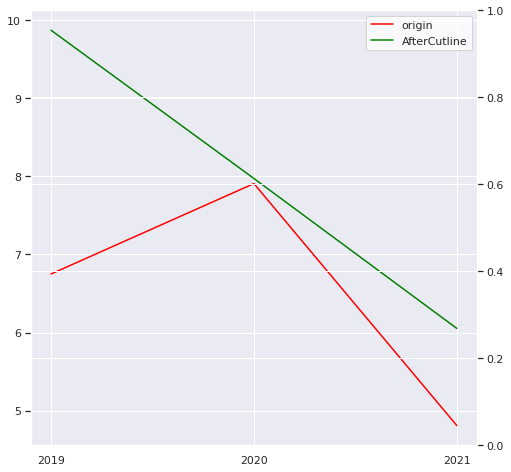

In [19]:
# 최저기준 충족하지 못한 인원들에 대한 경쟁률
origin_com=[competition.loc['경쟁률'].values[0],competition.loc['경쟁률'].values[1],competition.loc['경쟁률'].values[2],competition.loc['경쟁률'].values[3]]

cutline_com = [(df19_ori.loc['컴퓨터학부'].values[6]/df19_ori.loc['컴퓨터학부'].values[8]), (df20_ori.loc['컴퓨터공학과'].values[5]/df20_ori.loc['컴퓨터공학과'].values[7]),
               (df21_ori.loc['컴퓨터공학과'].values[5]/df21_ori.loc['컴퓨터공학과'].values[7])]

ig, ax = plt.subplots(figsize=(8,8))
ax2= ax.twinx()

sns.lineplot(x=['2019','2020','2021'],
             y=[(df19_ori.loc['컴퓨터학부'].values[6]/df19_ori.loc['컴퓨터학부'].values[8]), (df20_ori.loc['컴퓨터공학과'].values[5]/df20_ori.loc['컴퓨터공학과'].values[7]),
               (df21_ori.loc['컴퓨터공학과'].values[5]/df21_ori.loc['컴퓨터공학과'].values[7])],
             color='red', ax=ax)

sns.lineplot(x=['2019','2020','2021'],
             y=[df19_ori.loc['컴퓨터학부'].values[5],df20_ori.loc['컴퓨터공학과'].values[4], df21_ori.loc['컴퓨터공학과'].values[4]],
             color='green', ax=ax)


ax.legend(['origin', 'AfterCutline'], facecolor='w')
plt.show()